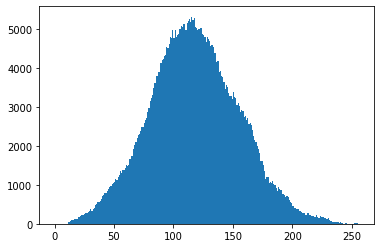

[5.24164240s] whole_histed(<__main__.CvImage object at 0x000001E94821A288>) -> array([[181, 182, 176, ..., 169, 159, 150],
       [181, 182, 175, ..., 165, 157, 151],
       [183, 181, 173, ..., 160, 155, 153],
       ...,
       [ 91,  96, 104, ..., 109, 110, 109],
       [ 80,  86,  95, ..., 110, 110, 111],
       [ 71,  80,  90, ..., 111, 112, 112]], dtype=uint8)


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 28 20:20:47 2014
@author: xiaotingting
"""
import time, timeit
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)R
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    return clocked
def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image=func(*args)
        plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image
    return whole_histed
def show_img(func):
    def show_image(*args):
        image=func(*args)
        cv2.imshow('dst',image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image
    return show_image
# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed
 
# @clock
# def run(seconds):
#     time.sleep(seconds)
#     return time
class CvImage():
    def __init__(self,img_name,read_method,gray_method):
        self.img_name=img_name
        self.read_method=read_method
        self.gray_method=gray_method
        self.img=self.load_image()
    def load_image(self):
        pt=(os.getcwd()+'\\'+self.img_name)
#         print(pt)
        img = cv2.imread(pt,self.read_method)
        if img is None:
            raise Exception("Image is not found!", img)
        return img
    def image_to_gray1(self):
        img=self.img
        grayimg = np.zeros(img.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i,j] = max(image[i,j][0], image[i,j][1], image[i,j][2])
        return grayimg
    def image_to_gray2(self):
        image=self.img
        #最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                grayimg[i, j] = (int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])) / 3
        return grayimg
    def image_to_gray3(self):
        image=self.img
        #最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                # Y = 0．3R + 0．59G + 0．11B
                # 通过cv格式打开的图片，像素格式为 BGR
                grayimg[i, j] = 0.3 * image[i, j][2] + 0.11 * image[i, j][0] + 0.59 * image[i, j][1]
        return grayimg
    
# plt.subplot(121)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.subplot(122)
# plt.imshow(grayimg,cmap="gray")
#         plt.subplot(121)
#         plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#         plt.subplot(122)
#         plt.imshow(grayimg,cmap="gray")
    @clock

    @whole_hist
    @show_img
    def image_to_gray(self):
        if self.gray_method in range(1,4):
            if self.gray_method==1:
                return self.image_to_gray1()
            elif self.gray_method==2:
                return self.image_to_gray2()
            elif self.gray_method==3:
                return self.image_to_gray2()
        else :
            raise Exception("Gray_method is not in 1,2,3!", gray_method)
#     @staticmethod
#     def show_image(img):
#         cv2.imshow('dst',img)
#         if cv2.waitKey(0) & 0xff == 27:
#             cv2.destroyAllWindows()
    @staticmethod
    def image_chazhi(*args,**dicts):
        '''
        在图像经过空间位置变换之后，需要求取在新平面的新排列的各点像素的位置，其并不会改变映射前后的像素的像素值。
        '''
        pass

if __name__ == '__main__':
#    run(1)
    img0=CvImage('leaf0.jpg',1,3)
    img1=img0.image_to_gray()